# Model Experiments Phase - TSA 1001

#### Import Necessary Libraries

In [1]:
# Basic Libraies
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
#!pip install mlflow

In [3]:
# !pip install sktime

#### About Data

1. volume- v4 (best selected features with Ridge & Decesion Tree)- As per session
2. volumn-v5 (best selected features with Ridge & Ridge)

In [4]:
data = pd.read_parquet("D:/Study/PROJECT-REALTIME/PT-1001/model_output_data/output/sales_bya_v4.parquet") # I guest data not be requried, need confirmation
df = data.copy()

In [5]:
df.head()

,net_price_lag_14,net_price_window_7_std,date_quarter_end,net_price_lag_7,date_year_start,net_price_lag_3,net_price_lag_28,date_month_start,date_year_end,date_quarter_start,date_month_end,date_weekend,net_price,date
0,5.255228e+06,5.136896e+06,0,1.914946e+05,0,2599070.50,26272324.0,0,0,0,0,0,5042942.0,2019-08-08
1,1.155514e+07,5.042066e+06,0,1.105840e+07,0,4009107.25,15105817.0,0,0,0,0,1,2932270.5,2019-08-10
2,7.580881e+04,4.480915e+06,0,5.000808e+06,0,4451132.00,5594980.5,0,0,0,0,0,1809937.5,2019-08-12
3,3.132104e+06,4.958484e+06,0,2.071218e+04,0,5042942.00,9242950.0,0,0,0,0,0,3067519.0,2019-08-13
4,4.743207e+06,5.091923e+06,0,2.599070e+06,0,2932270.50,9014580.0,0,0,0,0,0,5123492.0,2019-08-14


In [6]:
df.shape

(1121, 14)

#### Loading Folds

In [7]:
folds = np.load("D:/Study/PROJECT-REALTIME/PT-1001/model_output_data/output/folds_v2.npz")
folds.files

['train_0', 'test_0', 'train_1', 'test_1', 'train_2', 'test_2']

In [8]:
# Access Folds
train = df.loc[folds['train_2']]
test = df.loc[folds['test_2']]

In [9]:
train.shape

(841, 14)

In [10]:
test.shape

(280, 14)

In [11]:
841+280 # verified

1121

In [12]:
841/1121

0.7502230151650312

In [13]:
# Training Set
X = train.drop(columns=['date','net_price'])
y = train['net_price']

In [14]:
# Test Set
Xt = test.drop(columns=['date','net_price'])
yt = test['net_price']

- We will train on train data & test on test set(280 data points)
- Still we are doing this on a single folder i.g (train_2, test_2)

In [15]:
# Check the whether the lenge of data is same for both train & test set
print(X.shape)
print(y.shape)
print(Xt.shape)
print(yt.shape)

(841, 12)
(841,)
(280, 12)
(280,)


#### Required Libraries with Mlflow ( Prerequisit for Modeling)

In [26]:
import mlflow
from sklearn.neighbors import KNeighborsRegressor                    # required for model i.g 3.1
from sklearn.metrics import r2_score, mean_absolute_percentage_error  # required for evaluation i.g 3.1
# mlflow.create_experiment('Net Price Forecasting')    # this is one time, return a unique ID / hash ID

<center><h1> Experiments </center></h1>

##### Test Model 1: KNeighbors TimeSeries Regressor

In [17]:
'''# import library
from sktime.regression.distance_based import KNeighborsTimeSeriesRegressor

# modeling
knn = KNeighborsTimeSeriesRegressor(
    n_neighbors=5, weights='uniform', algorithm='brute',
    distance='dtw', distance_params=None,
    distance_mtype=None, leaf_size=30, n_jobs=None)

# fit the model
knn.fit(X,y)'''

# Model 1 : not suitable here! see notes below!

"# import library\nfrom sktime.regression.distance_based import KNeighborsTimeSeriesRegressor\n\n# modeling\nknn = KNeighborsTimeSeriesRegressor(\n    n_neighbors=5, weights='uniform', algorithm='brute',\n    distance='dtw', distance_params=None,\n    distance_mtype=None, leaf_size=30, n_jobs=None)\n\n# fit the model\nknn.fit(X,y)"

##### Test Model 2: Ridge Regression

In [18]:
# import library
from sklearn.linear_model import Ridge

# Modeling 
model= Ridge(
    alpha=1.0, fit_intercept=True, copy_X=True, max_iter=None,
    tol=0.0001, solver='auto', positive=False, random_state=42,
)

# Fit the model
model.fit(X,y)

Ridge(random_state=42)

##### Test Model 3: KNeighbors Regressor - without Mlflow

In [19]:
# import library
from sklearn.neighbors import KNeighborsRegressor

# Modeling 
model= KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='euclidean')

# Fit the model
model.fit(X,y)

KNeighborsRegressor(metric='euclidean')

#### Checking Shape- Error Fixation

In [20]:
Xt.shape

(280, 12)

In [21]:
yt.shape # not matched

(280,)

##### Test Model 3.1: KNeighbors Regressor  with mflow

In [22]:

mlflow.set_experiment('Net Price Forecasting')      # it will log hash executed for 'Net Price forecasting'
with mlflow.start_run():                            # it will create a session with mlflow
    model= KNeighborsRegressor(n_neighbors=9, weights='uniform', metric='euclidean')
    model.fit(X,y)                                 # train the model on train data
    
    ### log params
    mlflow.log_params(dict(n_neighbors=9, weights='uniform', metric='euclidean'))
    
    ### log metrics
    mlflow.log_metrics(
        {
            'r2': r2_score(model.predict(Xt), yt),  # it will cal r2_score on test data, Xt:prediction, yt: actual
            'mse': mean_absolute_percentage_error(model.predict(Xt), yt)
        }
    )
    
    ### log model 

    



###
# it will log params, metrics, model for every iteration / run

### Task (Takeaway)

1. Task1: Import libraries
2. Task2: load best selected features, not data
3. Task3: Experiments
4. Task4: Modeling i.g KNeighbors

### Splitting

In [24]:
# ts = TimeSeriesSplit(n_splits=2, max_train_size=800, test_size=25, gap=0) # since max data is 1100+ so, max_train_size 800, gap = no gap in spliting in date range
# folds = list(ts.split(df))                                                              # the generator has 2 folds that we can asscess, if you c

In [ ]:
# Accessing 
# list(ts.split(df)) [0] # train index

In [ ]:
# list(ts.split(df)) [1] # test index

In [ ]:
# storing folds
train = df.loc[folds[1][0]] # training 2 fold, 1st index for train
test = df.loc[folds[1][1]]  # testing 2 fold, 2nd index for test

In [ ]:
train.shape 

In [ ]:
test.shape

## 3.0 Experiments- Testing

#### code Narraation - Splitter

1. import package i.g TimeSeriesSplit(n_splits=2, max_train_size=800, test_size=25, gap=0) 
2. ts.split(df) > it will return a generator from that we can access, but for access need to convert into list first
3. list(ts.split(df)) > converted to get get & access the folds/ data. Check the index
4. store this index somewhere i.g folds  example folds = list(ts.split(df))
5. access folds
- train = df.loc[folds[1]]  >> two folds 0, 1 >> we are targeting 2nd or the folds with max data i.g 1 and then take only few not all, that is training i.g 0 as below:
- train = df.loc[folds[1][0]]

##### Model 1: Notes

In [ ]:
'''
Test:
1. Lets take train_4 to have more data

'''

### Model - Commits

1. old_folds: ("E:/M58/ProjectsDS/TSA-1001/PT-1001-RS/model_saved_data/output/folds.npz")

<center> <h3> End of model (model1) Testing </h3></center>

#### Attempts

1. KNeighborsTimeSeriesRegressor  -- Failed >>  hten approach to Darts model with XGBoost Model (

1. Darts model with XGBoost Model (Planned but skipped due to hardness)
2. Then taken Linear Regession for is ease & simplicity

##### Genearal Notes

1. We will take best features and do modeling on that to see which one is performing well
2. No need to take data in this part
3. We need the terminal > jupyer > new > terminal

#### Darts Model

1. Not by default need to install
2. Darts expect params to pass, it generate differnet time series (requirment e.g lags, window etc) automatically, but we already convert time series data to tabular form
3. So, need to go with normal machine learing approach l.g sklearn
4. We haave already calculated lags, window, expanding window, so the task of dart we already completed!


In [ ]:
# Modeling Steps
'''
1. Import necessary library
2. Train & Test dataset (train test or load train / test data)
3. mode architecture
4. result interpretion/analysis

'''

#### Mlflow- opening from terminal

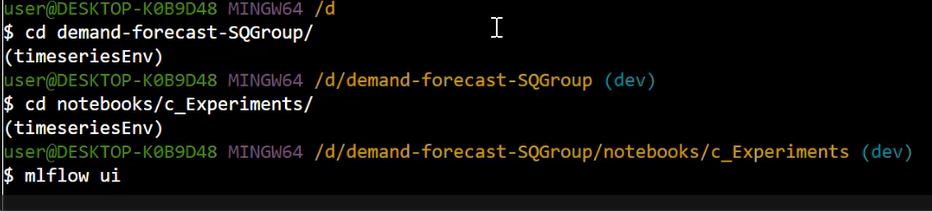

#### Ref

1. https://tslearn.readthedocs.io/en/latest/gen_modules/neighbors/tslearn.neighbors.KNeighborsTimeSeriesRegressor.h